# Grid Contour plot

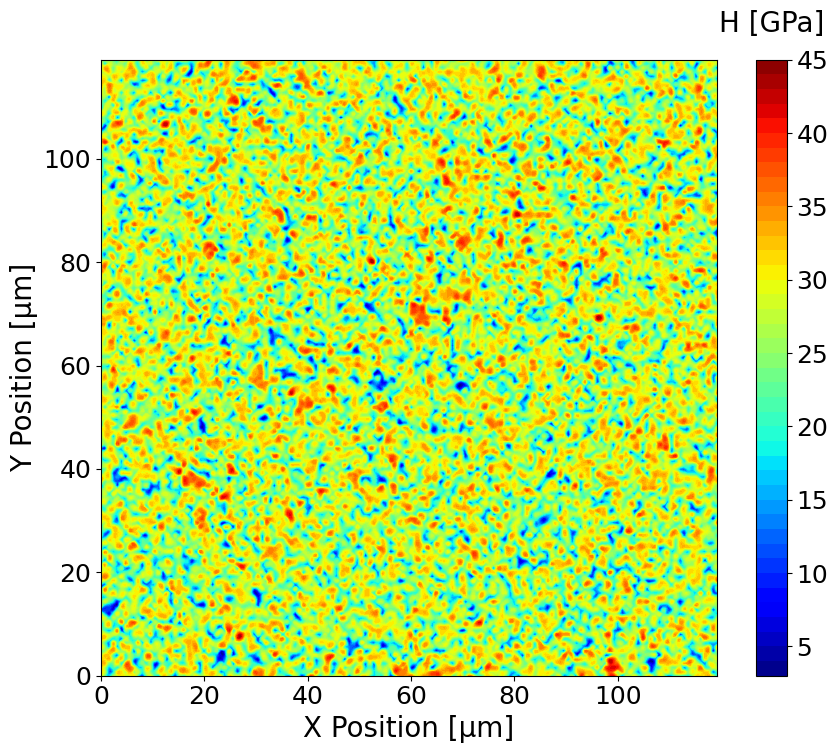

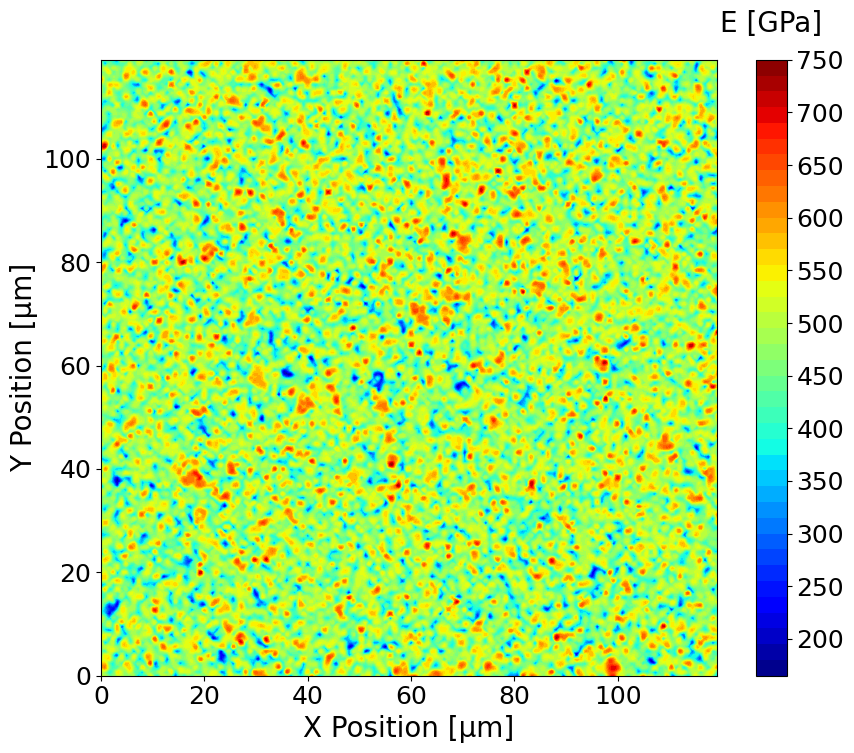

In [4]:
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Change the file and sheet names as needed
excel = '/content/WCNiFine-4D-80nm-150x150_filtered.xlsx'
sheet_name = 'Test 1'

# Read the data from the Excel file
df = pd.read_excel(excel, sheet_name)

# Drop rows where 'HARDNESS' is NaN and remove the first row if it's not useful
df.dropna(subset=['HARDNESS'], inplace=True)
df = df.iloc[1:]

# Extract and rename columns
X = df['X'].values  # X positions
Y = df['Y'].values  # Y positions
H = df['HARDNESS'].values.astype(float)  # Hardness
E = df['MODULUS'].values.astype(float)  # Modulus

# Sort X and Y while keeping the corresponding H and E values
sort_indices = np.lexsort((Y, X))
X_sorted = X[sort_indices]
Y_sorted = Y[sort_indices]
H_sorted = H[sort_indices]
E_sorted = E[sort_indices]

# Define minimum and maximum values for the plots
vmin_H, vmax_H = 3, 45  # Hardness range
vmin_E, vmax_E = 150, 800  # Modulus range

# Generate a regular grid of points for interpolation
new_X, new_Y = np.meshgrid(
    np.linspace(X_sorted.min(), X_sorted.max(), 500),
    np.linspace(Y_sorted.min(), Y_sorted.max(), 500)
)

# Interpolate H (Hardness) and E (Modulus) on the regular grid
H_interp = griddata((X_sorted, Y_sorted), H_sorted, (new_X, new_Y), method='cubic')
E_interp = griddata((X_sorted, Y_sorted), E_sorted, (new_X, new_Y), method='cubic')

# Plot Hardness (H)
fig1 = plt.figure(figsize=(10, 8))
plt.gca().set_aspect('equal')  # Ensure aspect ratio is equal
H_matrix_clipped = np.clip(H_interp, vmin_H, vmax_H)  # Clip values to the specified range
levels = 50  # Number of contour levels
im1 = plt.contourf(new_X, new_Y, H_matrix_clipped, cmap='jet', levels=levels)
plt.xlabel('X Position [μm]', fontsize=20)
plt.ylabel('Y Position [μm]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)

# Add a colorbar for Hardness
cbar1 = fig1.colorbar(im1)
cbar1.ax.set_title('H [GPa]', fontsize=20, pad=20)
cbar1.ax.yaxis.set_label_coords(-0.1, 0.5)
cbar1.ax.tick_params(labelsize=18)

# Set the colorbar tick labels to display every 5 units
from matplotlib.ticker import MultipleLocator
tick_spacing_H = 5
cbar1.ax.yaxis.set_major_locator(MultipleLocator(tick_spacing_H))

# Plot Modulus (E)
fig2 = plt.figure(figsize=(10, 8))
plt.gca().set_aspect('equal')  # Ensure aspect ratio is equal
E_matrix_clipped = np.clip(E_interp, vmin_E, vmax_E)  # Clip values to the specified range
levels = 45  # Number of contour levels
im2 = plt.contourf(new_X, new_Y, E_matrix_clipped, cmap='jet', levels=levels)
plt.xlabel('X Position [μm]', fontsize=20)
plt.ylabel('Y Position [μm]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)

# Add a colorbar for Modulus
cbar2 = fig2.colorbar(im2)
cbar2.ax.set_title('E [GPa]', fontsize=20, pad=20)
cbar2.ax.yaxis.set_label_coords(-0.1, 0.5)
cbar2.ax.tick_params(labelsize=18)

# Set the colorbar tick labels to display every 50 units
tick_spacing_E = 50
cbar2.ax.yaxis.set_major_locator(MultipleLocator(tick_spacing_E))

plt.show()



In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel('/content/WCNiFine-4D-80nm-150x150_filtered.xlsx', sheet_name='Sheet1')

df = df.astype(float)
H = df['HARDNESS'].values.astype(float)
E = df['MODULUS'].values.astype(float)

plt.figure(figsize=(15, 15))  # Ajust

# Generate the joint plot
g = sns.jointplot(x=H, y=E, kind="scatter", color='dodgerblue', s=2, marginal_kws=dict(bins=50))

# Set limits on the axes
g.ax_joint.set_xlim(0, 45)  # Ajust
g.ax_joint.set_ylim(100, 800)  # Ajust

g.ax_joint.set_xlabel('Hardness [GPa]', fontsize=20)
g.ax_joint.set_ylabel('Modulus [GPa]', fontsize=20)
g.ax_joint.tick_params(axis='both', which='major', labelsize=18, width=2)
g.ax_joint.tick_params(axis='both', which='minor', labelsize=16, width=1.5)

plt.show()